<a href="https://colab.research.google.com/github/HugoSilvaRodrigues/AED/blob/main/EPC8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [154]:

rentals=pd.read_csv("/content/drive/MyDrive/AED/PROJETO/rentals.csv", index_col=False, usecols=['latitude', 'longitude', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'minimum_nights', 'price'])

#Analise dos dados

In [155]:
rentals.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [156]:
rentals2=rentals.copy()

In [157]:
rentals.shape

(8111, 8)

In [158]:
rentals.dtypes


latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

In [159]:
rentals['price']
rentals['price']=rentals['price'].str.strip("$")
rentals['price']=rentals['price'].str.strip(" ")
rentals['price']=rentals['price'].str.replace(',','')
rentals['price']=rentals['price'].astype(float)


In [160]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8111 non-null   float64
 1   longitude       8111 non-null   float64
 2   property_type   8111 non-null   object 
 3   room_type       8111 non-null   object 
 4   bathrooms       8099 non-null   float64
 5   bedrooms        8107 non-null   float64
 6   minimum_nights  8111 non-null   int64  
 7   price           8111 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 507.1+ KB




*   Tem valores ausentes



In [161]:
rentals.dropna(inplace=True)
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8095 non-null   float64
 1   longitude       8095 non-null   float64
 2   property_type   8095 non-null   object 
 3   room_type       8095 non-null   object 
 4   bathrooms       8095 non-null   float64
 5   bedrooms        8095 non-null   float64
 6   minimum_nights  8095 non-null   int64  
 7   price           8095 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 569.2+ KB


In [162]:
rentals.describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8095.000000,8095.000000,8095.000000,8095.000000,8.095000e+03,8095.000000
mean,37.766017,-122.430126,1.395862,1.346387,1.236963e+04,225.646325
std,0.022937,0.026974,0.923114,0.925888,1.111454e+06,412.575797
min,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,37.751430,-122.442855,1.000000,1.000000,2.000000e+00,100.000000
50%,37.769090,-122.424670,1.000000,1.000000,4.000000e+00,150.000000
75%,37.785600,-122.410625,1.500000,2.000000,3.000000e+01,240.000000
max,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


In [163]:
rentals.skew(axis = 0)

<ipython-input-163-ff44421a3196>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rentals.skew(axis = 0)


latitude          -0.445444
longitude         -0.959394
bathrooms          4.414721
bedrooms           1.569869
minimum_nights    89.972218
price             16.152055
dtype: float64

In [164]:
rentals.minimum_nights.value_counts(dropna=True)

30           3262
2            1553
1            1422
3             863
4             322
5             216
31            114
7              74
32             60
60             40
6              36
90             31
180            18
14             10
365             9
13              4
120             4
21              4
10              4
183             3
360             3
50              3
80              3
18              2
29              2
45              2
58              2
8               2
75              2
40              2
100             1
1000            1
65              1
15              1
12              1
38              1
25              1
11              1
150             1
188             1
59              1
100000000       1
85              1
1125            1
28              1
140             1
55              1
110             1
16              1
70              1
200             1
9               1
33              1
Name: minimum_nights, dtype: int64

In [165]:
rentals['minimum_nights'] = np.log(rentals['minimum_nights'])

In [166]:
rentals.minimum_nights.value_counts(dropna=True)

3.401197     3262
0.693147     1553
0.000000     1422
1.098612      863
1.386294      322
1.609438      216
3.433987      114
1.945910       74
3.465736       60
4.094345       40
1.791759       36
4.499810       31
5.192957       18
2.639057       10
5.899897        9
2.564949        4
4.787492        4
3.044522        4
2.302585        4
5.209486        3
5.886104        3
3.912023        3
4.382027        3
2.890372        2
3.367296        2
3.806662        2
4.060443        2
2.079442        2
4.317488        2
3.688879        2
4.605170        1
6.907755        1
4.174387        1
2.708050        1
2.484907        1
3.637586        1
3.218876        1
2.397895        1
5.010635        1
5.236442        1
4.077537        1
18.420681       1
4.442651        1
7.025538        1
3.332205        1
4.941642        1
4.007333        1
4.700480        1
2.772589        1
4.248495        1
5.298317        1
2.197225        1
3.496508        1
Name: minimum_nights, dtype: int64

In [167]:
rentals.skew(axis = 0)

<ipython-input-167-ff44421a3196>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rentals.skew(axis = 0)


latitude          -0.445444
longitude         -0.959394
bathrooms          4.414721
bedrooms           1.569869
minimum_nights     0.237254
price             16.152055
dtype: float64

In [168]:
rentals.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'bathrooms',
       'bedrooms', 'minimum_nights', 'price'],
      dtype='object')

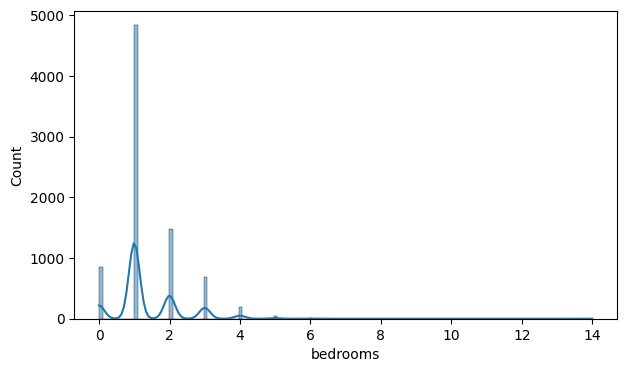

In [169]:
plt.figure(figsize = (7, 4))
sns.histplot(data = rentals, x = rentals['bedrooms'], kde = True)
plt.show()



*   Maioria das casas com 1 quarto





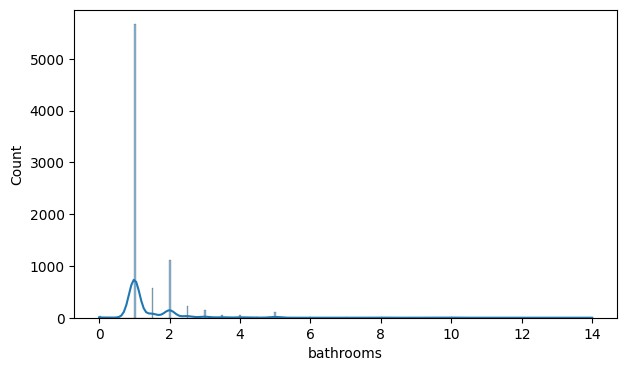

In [170]:
plt.figure(figsize = (7, 4))
sns.histplot(data = rentals, x = rentals['bathrooms'], kde = True)
plt.show()



*   Maioria das casas com 1 banheiro




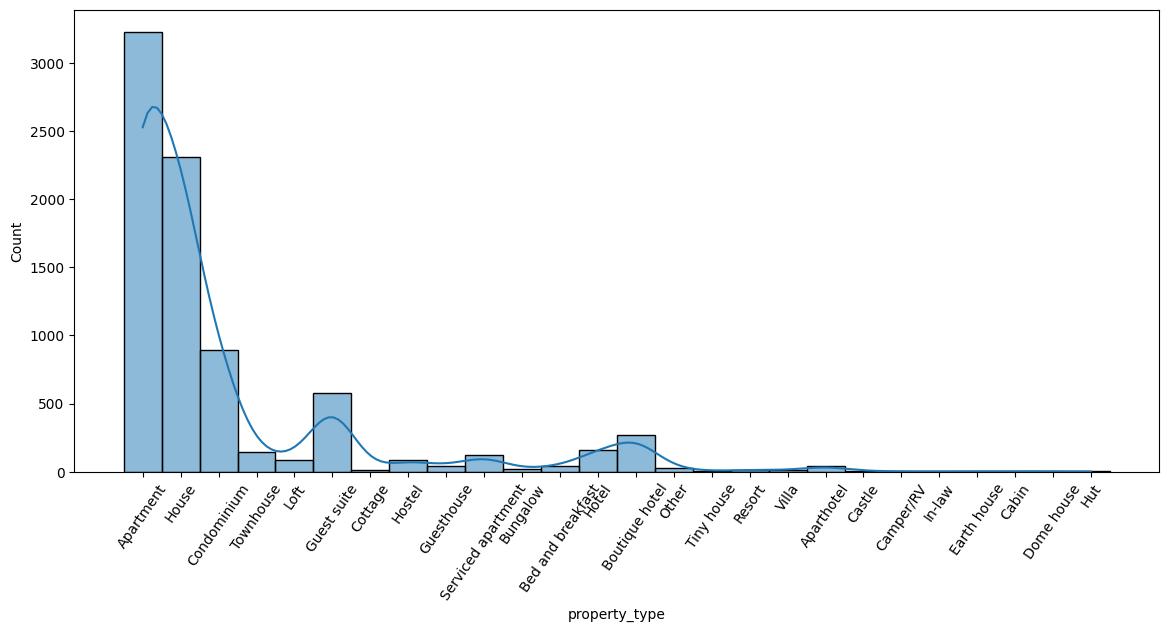

In [171]:
plt.figure(figsize = (14, 6))
sns.histplot(data = rentals, x = rentals['property_type'], kde = True)
plt.xticks(rotation=55)
plt.show()

Maioria das propiedades são do tipo Apartamento e casa

In [172]:
rentals.corr()

<ipython-input-172-b8fbe2a52e05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rentals.corr()


,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.187000,0.078469,-0.108647,0.176787,0.083231
longitude,0.187000,1.000000,0.007627,-0.115893,0.114537,0.015867
bathrooms,0.078469,0.007627,1.000000,0.327916,0.029689,0.081981
bedrooms,-0.108647,-0.115893,0.327916,1.000000,-0.002005,0.262343
minimum_nights,0.176787,0.114537,0.029689,-0.002005,1.000000,-0.073196
price,0.083231,0.015867,0.081981,0.262343,-0.073196,1.000000


<ipython-input-173-8f507fee041d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rentals.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)


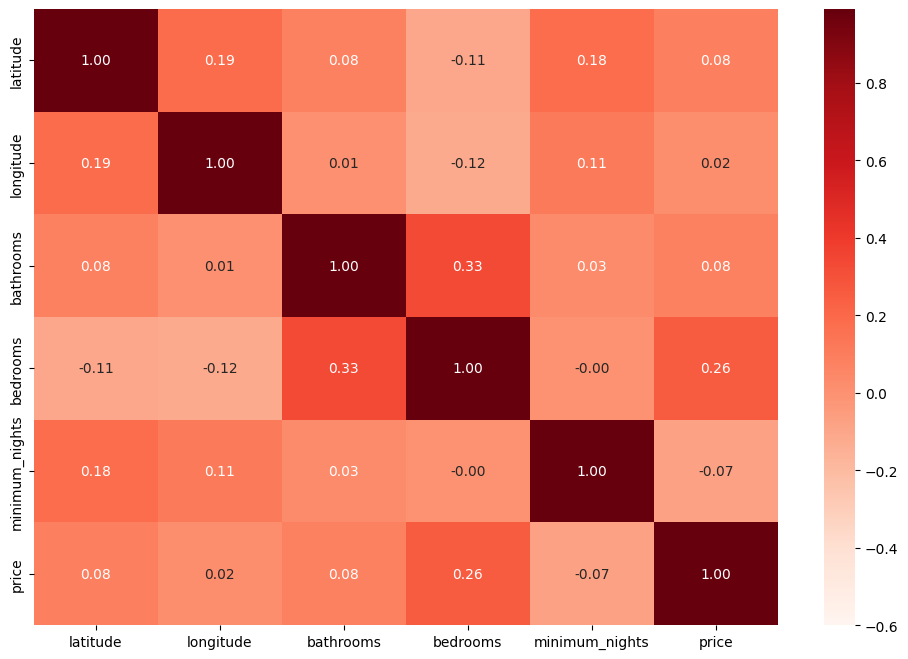

In [173]:
plt.figure(figsize = (12,8))
sns.heatmap(rentals.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

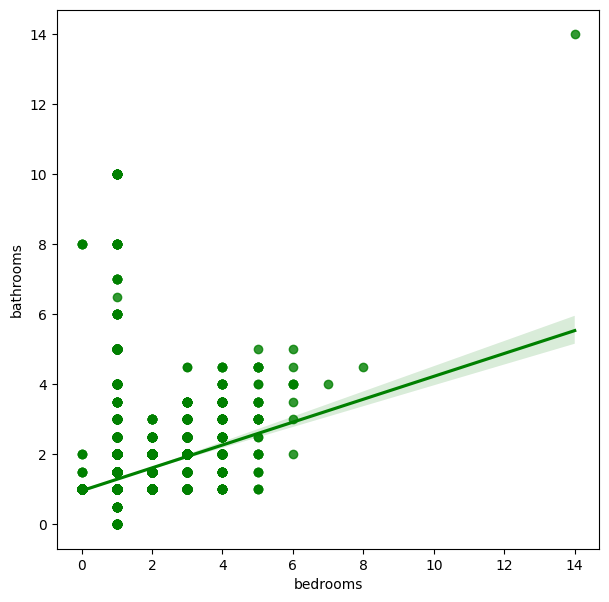

In [174]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'bedrooms', y = 'bathrooms', data = rentals, color = 'green')
plt.show()

Quanto mais quarto mais banheiro

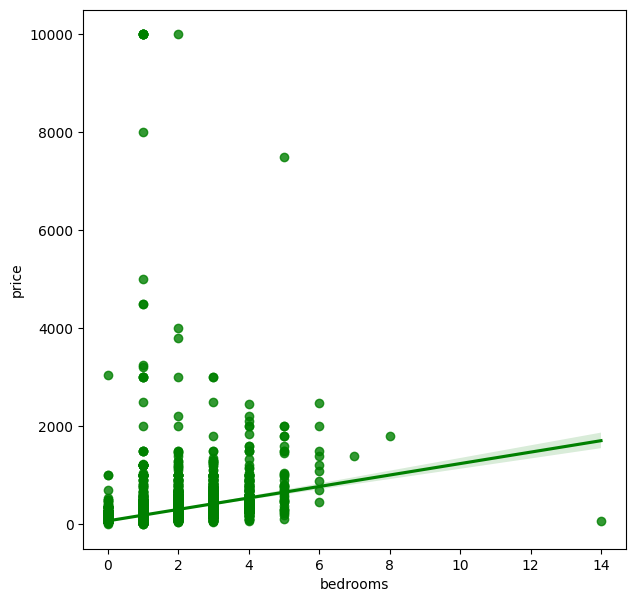

In [175]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'bedrooms', y = 'price', data = rentals, color = 'green')
plt.show()

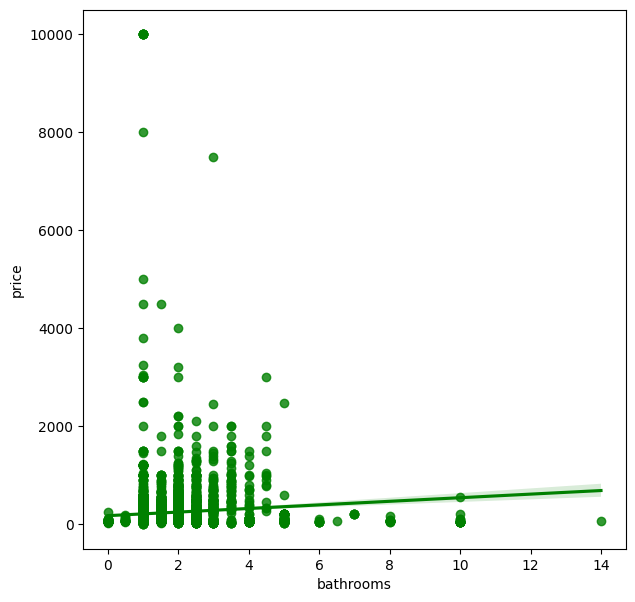

In [176]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'bathrooms', y = 'price', data = rentals, color = 'green')
plt.show()

Mais quarto mais caro a diaria

#Removendo outliers

##Property type

In [177]:
print(rentals.property_type.value_counts())

Apartment             3234
House                 2313
Condominium            892
Guest suite            577
Boutique hotel         267
Hotel                  157
Townhouse              142
Serviced apartment     121
Loft                    88
Hostel                  86
Bed and breakfast       43
Guesthouse              41
Aparthotel              41
Other                   24
Bungalow                17
Resort                  14
Cottage                 12
Villa                   10
Castle                   4
Cabin                    3
Tiny house               3
Earth house              2
In-law                   1
Camper/RV                1
Dome house               1
Hut                      1
Name: property_type, dtype: int64


##Bedrooms


1.0     4833
2.0     1472
0.0      854
3.0      694
4.0      193
5.0       37
6.0        9
14.0       1
7.0        1
8.0        1
Name: bedrooms, dtype: int64


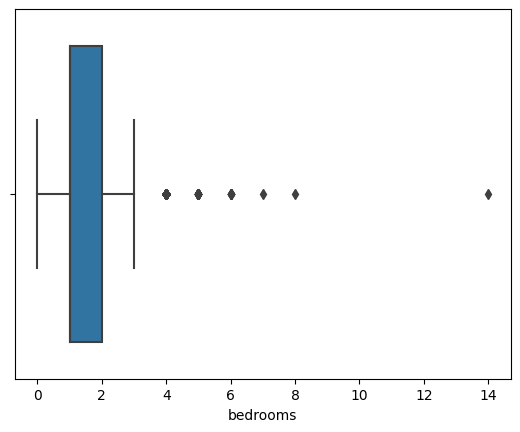

In [178]:
sns.boxplot(x=rentals['bedrooms'])
print(rentals['bedrooms'].value_counts().astype(int))

In [179]:
drop=[14,7,8]
rentals['bedrooms']=rentals['bedrooms'].astype(int)
for i in drop:
	rentals=rentals.drop(rentals[rentals.bedrooms == i].index)

##Bathrooms


1     6247
2     1345
3      211
5      113
4       73
0       55
10      19
8       14
6       10
7        5
Name: bathrooms, dtype: int64


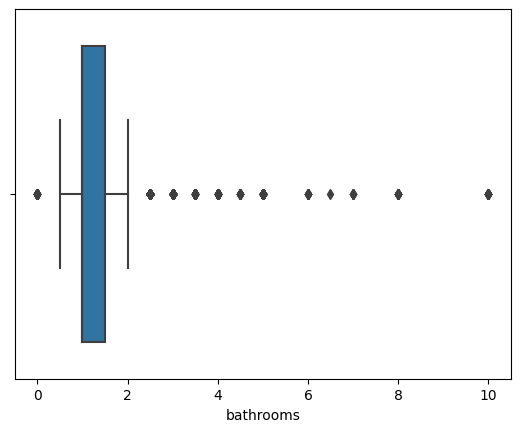

In [180]:
sns.boxplot(x=rentals['bathrooms'])
print(rentals['bathrooms'].astype(int).value_counts())

In [181]:
rentals=rentals.drop(rentals[rentals.bathrooms == 7].index)
rentals['bedrooms']=rentals['bedrooms'].astype(int)

##Minimum Nights


##Price

In [182]:
aux2=list(rentals.price.value_counts().index)


In [183]:
drop_3=aux2[230:]
for i in drop_3:
    rentals=rentals.drop(rentals[rentals.price==i].index)

rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        7434 non-null   float64
 1   longitude       7434 non-null   float64
 2   property_type   7434 non-null   object 
 3   room_type       7434 non-null   object 
 4   bathrooms       7434 non-null   float64
 5   bedrooms        7434 non-null   int64  
 6   minimum_nights  7434 non-null   float64
 7   price           7434 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 522.7+ KB


#Modelo

In [184]:

rentals_dummies=pd.get_dummies(rentals)
X=rentals_dummies.drop(columns=['price'])
y=rentals_dummies.price



In [185]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [186]:
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [187]:
from sklearn.ensemble import RandomForestRegressor


model =RandomForestRegressor()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict)*100)

67.5647155906062


In [188]:
result={'y':y_test,'Predict':y_predict}
result_df=pd.DataFrame(result)

In [189]:

print(result_df.head(30))

          y  Predict
4271   82.0   112.54
1649  350.0   282.39
3205   75.0    91.88
3131   40.0   184.14
7140  180.0   210.34
6403  217.0   273.83
965   143.0   189.08
3431  350.0   332.75
7087   39.0    42.34
6499  235.0   558.62
7445  122.0   115.62
3640  150.0   290.62
1262  250.0   351.08
4004   89.0    84.27
4668   90.0    84.08
7694  200.0   163.13
5292   90.0    86.30
3552   70.0    62.79
462    70.0   103.44
6759  310.0   447.46
5458  600.0   265.04
6962  240.0   167.12
1460  250.0   160.56
3087   80.0    81.16
5705   79.0   138.13
3372  149.0   130.96
6400  196.0   215.79
4997  110.0   136.29
5663  155.0   183.75
1210  150.0   160.10


#Encontrando um modelo melhor

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

param_grid=[{"n_estimators":[3,10,30], "max_features":[2,4,6,8], 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}]

# Criar o modelo de RandomForestRegressor
regressor = RandomForestRegressor()

# Definir a métrica de avaliação
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, scoring=scorer, cv=5)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Treinar o modelo final com os melhores hiperparâmetros
final_regressor = RandomForestRegressor(**best_params)
final_regressor.fit(X_train, y_train)

# Fazer previsões usando o modelo final
y_pred = final_regressor.predict(X_test)
print(r2_score(y_test,y_pred)*100)

90.30535006199113


In [191]:
print(final_regressor)

RandomForestRegressor(max_features=4, n_estimators=30)


In [192]:
result={'y':y_test,'Predict':y_pred}
result_df=pd.DataFrame(result)

In [193]:
print(result_df.head(30))


          y     Predict
4271   82.0  128.633333
1649  350.0  240.666667
3205   75.0  104.333333
3131   40.0  129.433333
7140  180.0  259.800000
6403  217.0  274.366667
965   143.0  201.800000
3431  350.0  346.666667
7087   39.0   48.133333
6499  235.0  530.733333
7445  122.0  108.333333
3640  150.0  273.166667
1262  250.0  356.266667
4004   89.0   83.300000
4668   90.0   84.500000
7694  200.0  193.366667
5292   90.0   82.600000
3552   70.0   64.866667
462    70.0  117.766667
6759  310.0  381.300000
5458  600.0  240.500000
6962  240.0  173.600000
1460  250.0  180.366667
3087   80.0   85.500000
5705   79.0  136.766667
3372  149.0  130.266667
6400  196.0  215.833333
4997  110.0  138.600000
5663  155.0  181.766667
1210  150.0  145.033333


#EPC9

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


num_pipeline=Pipeline([("scaler", StandardScaler()),
                        ("pca", PCA())
                       ])

cat_pipeline=Pipeline([("encoder", OneHotEncoder())
                       ])



In [195]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        7434 non-null   float64
 1   longitude       7434 non-null   float64
 2   property_type   7434 non-null   object 
 3   room_type       7434 non-null   object 
 4   bathrooms       7434 non-null   float64
 5   bedrooms        7434 non-null   int64  
 6   minimum_nights  7434 non-null   float64
 7   price           7434 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 522.7+ KB


In [196]:
X_num=rentals.drop(columns=['price', "property_type","room_type"])
X_cat=rentals[["property_type","room_type"]]
y_final=rentals.price
print(X_num.columns)
print(X_cat.columns)

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'minimum_nights'], dtype='object')
Index(['property_type', 'room_type'], dtype='object')


In [197]:
from sklearn.compose import ColumnTransformer

pipeline=ColumnTransformer([("num_pipeline",num_pipeline,list(X_num.columns)),
                           ("cat_pipeline", cat_pipeline,list(X_cat.columns))])
rentals_prepared=pipeline.fit_transform(rentals)
print(rentals_prepared)

  (0, 0)	-0.29232372237099147
  (0, 1)	-0.9048500009602105
  (0, 2)	-0.8475329825203883
  (0, 3)	-0.49661018131388324
  (0, 4)	-0.3557390239953838
  (0, 6)	1.0
  (0, 30)	1.0
  (1, 0)	-1.1537897580146672
  (1, 1)	-1.149370832788107
  (1, 2)	-0.3341032779064676
  (1, 3)	-0.6817246689929941
  (1, 4)	0.008206432889962402
  (1, 20)	1.0
  (1, 32)	1.0
  (2, 0)	-0.25334319018070217
  (2, 1)	0.38251405902831015
  (2, 2)	0.9043534813584807
  (2, 3)	1.3391256732598629
  (2, 4)	-0.16857560737183863
  (2, 6)	1.0
  (2, 30)	1.0
  (3, 0)	-0.18785960732501175
  (3, 1)	2.22819259131813
  (3, 2)	0.20069304632828053
  (3, 3)	-1.0468252735278634
  :	:
  (7430, 3)	-0.4273843839690834
  (7430, 4)	-0.5591512570644638
  (7430, 12)	1.0
  (7430, 30)	1.0
  (7431, 0)	0.4863068225265578
  (7431, 1)	0.5238462292758745
  (7431, 2)	-0.10281073312810061
  (7431, 3)	1.853812759105712
  (7431, 4)	1.3734994010932893
  (7431, 21)	1.0
  (7431, 32)	1.0
  (7432, 0)	1.3694867632753311
  (7432, 1)	0.14307898416953635
  (7432, 2

In [198]:
x_TRAIN,x_TEST,y_TRAIN,y_TEST=train_test_split(rentals_prepared,rentals.price,test_size = 0.2, random_state = 1)


In [199]:
regressor=final_regressor

regressor.fit(x_TRAIN, y_TRAIN)

# Fazer previsões usando o modelo final
y_pred = regressor.predict(x_TEST)
print(r2_score(y_TEST,y_pred)*100)

87.7485471522138


In [200]:
result_final={'y':y_TEST,'Predict':y_pred}
result_df_final=pd.DataFrame(result_final)

In [201]:
result_df_final.head(20)

,y,Predict
4271,82.0,71.600000
1649,350.0,272.166667
3205,75.0,99.666667
3131,40.0,141.566667
7140,180.0,203.000000
6403,217.0,279.633333
965,143.0,155.466667
3431,350.0,635.766667
7087,39.0,45.733333
6499,235.0,283.933333
